In [2]:
from utils import *
from transform import *
from IPython.display import Audio

In [2]:
#open("UrbanSound8K/audio/fold5/6508-9-0-1.wav")

In [3]:
Audio("UrbanSound8K/audio/fold5/6508-9-0-1.wav")

In [5]:
Audio("UrbanSound8K/audio/fold5/17578-5-0-1.wav")

In [6]:
Audio("UrbanSound8K/audio/fold4/344-3-4-0.wav")

In [4]:
Audio("models/output_1.wav")

In [4]:
def plot_wave(waveform):
    # Plot the waveform
    plt.plot(waveform.t().numpy())
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('Audio Waveform')
    plt.show()

def plot_spectrogram(spec):
    # Assuming spec has shape [channel, n_mels, time]
    # You can choose a specific channel (e.g., mono) or average over channels
    # For simplicity, let's assume you want to plot the first channel
    channel_index = 0
    spec_channel = spec[channel_index, :, :]
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.imshow(spec_channel, aspect='auto', origin='lower', cmap='viridis')  # You can choose a different colormap
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency Bin')
    plt.colorbar(label='Amplitude (dB)')
    
    plt.show()
    

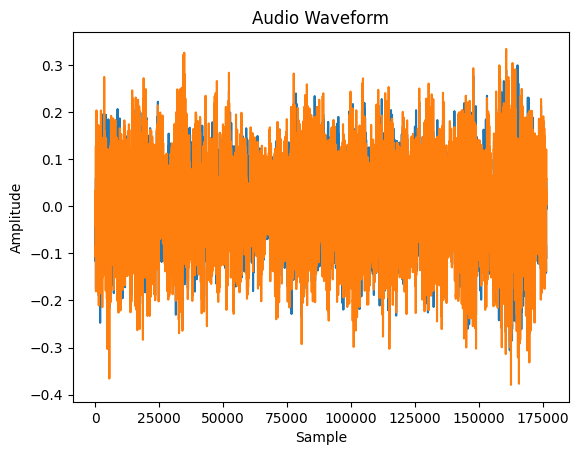

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

waveform, sample_rate = AudioUtil.open(r'UrbanSound8K/audio/fold5/6508-9-0-6.wav')

# Plot the waveform
plt.plot(waveform.t().numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

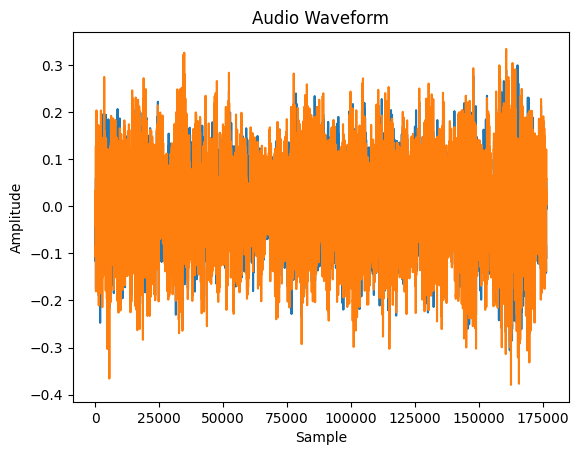

In [6]:
aud = waveform, sample_rate
reaud = AudioUtil.resample(aud, 44100)
# Plot the waveform
plt.plot(reaud[0].t().numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

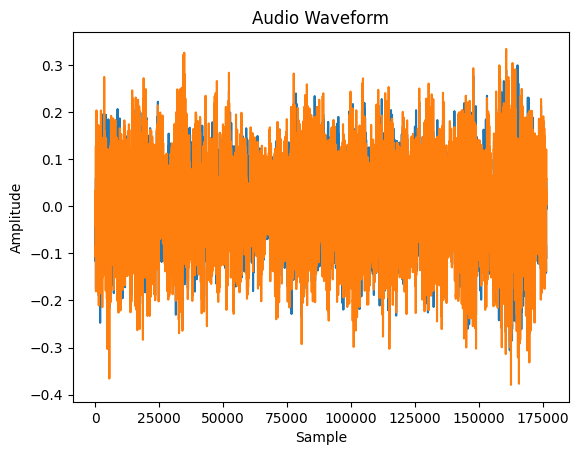

In [7]:
rechan = AudioUtil.rechannel(reaud, 2)
plot_wave(rechan[0])

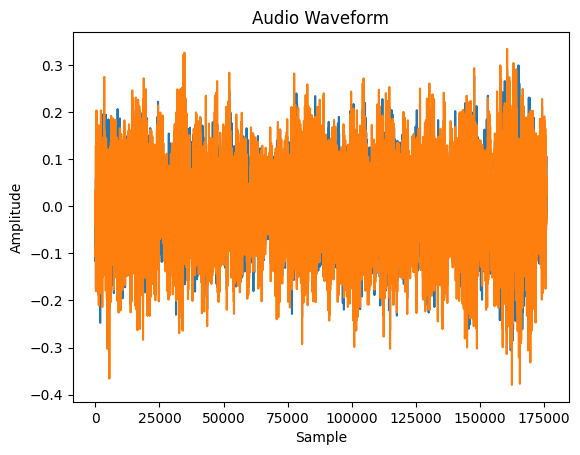

In [8]:
dur_aud = AudioUtil.pad_trunc(rechan, 4000)
plot_wave(dur_aud[0])

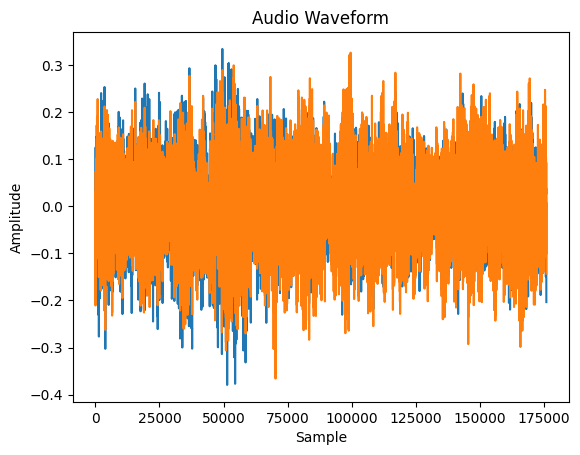

In [9]:
shift_aud = AudioUtil.time_shift(dur_aud, 0.4)
plot_wave(shift_aud[0])

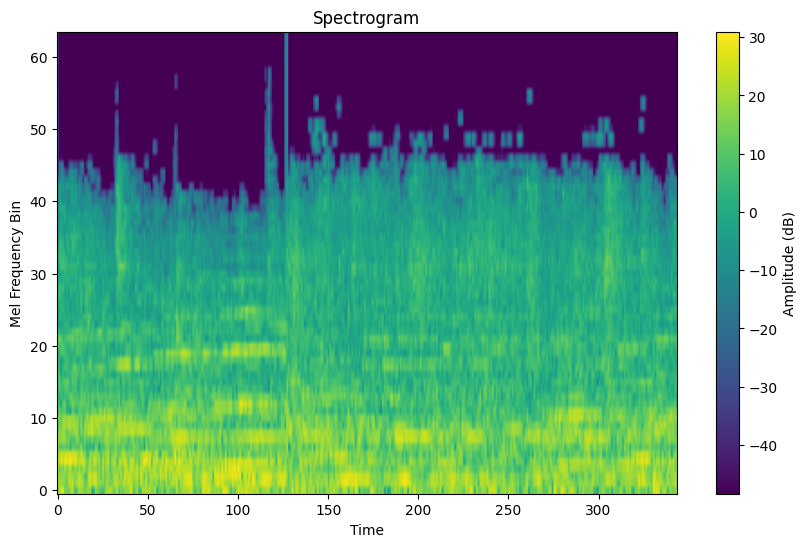

In [10]:
sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
plot_spectrogram(sgram)

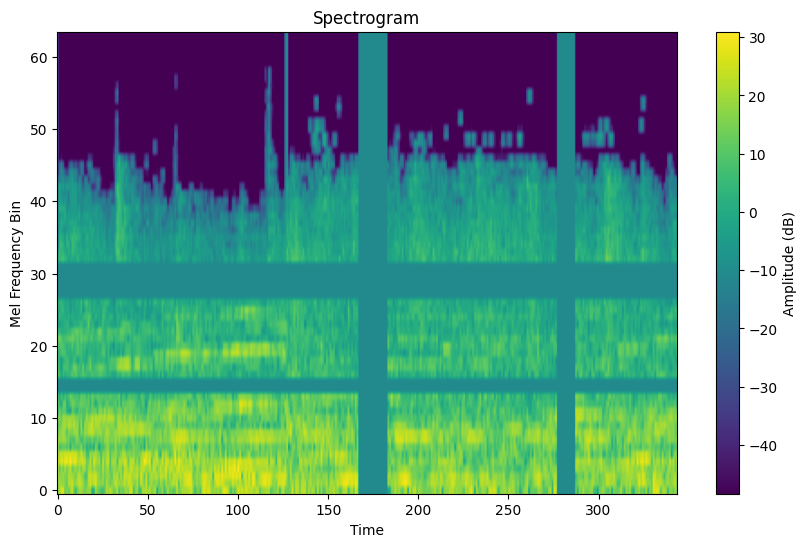

In [12]:
aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
plot_spectrogram(aug_sgram)